# Cervical cancer (Risk Factors)

In [18]:
import pandas as pd
import ehrapy as ep
import numpy as np
import ehrdata as ed
import warnings
warnings.filterwarnings("ignore")

In [19]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [20]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv

Nothing to do - goodbye


# Data Wrangling

Since the dataset does not have a patient ID we add one.

In [21]:
data = pd.read_csv("risk_factors_cervical_cancer.csv",
                   sep=",")

In [22]:
data["patient_id"] = range(1, len(data) + 1)

Replace "?"(missing value) with NaN and convert from object type to numeric type

In [23]:
for att in data.columns:
    data[att].replace('?', np.nan, inplace=True)
    data[att] = pd.to_numeric(data[att])

In [24]:
data.set_index("patient_id", inplace=True)

In [25]:
data.to_csv("risk_factors_cervical_cancer_prepared.csv")

## ehrapy sanity check

In [26]:
adata = ep.io.read_csv("risk_factors_cervical_cancer_prepared.csv",
                   index_column="patient_id")
edata = ed.EHRData.from_adata(adata=adata)

In [27]:
edata.var_names

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [28]:
ep.ad.feature_type_overview(edata)

! Features 'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy' were detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.


 Detected feature types for AnnData object with 858 obs and 36 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ Age
║   ╠══ First sexual intercourse
║   ╠══ Hormonal Contraceptives (years)
║   ╠══ IUD (years)
║   ╠══ Num of pregnancies
║   ╠══ Number of sexual partners
║   ╠══ STDs: Time since first diagnosis
║   ╠══ STDs: Time since last diagnosis
║   ╠══ Smokes (packs/year)
║   ╚══ Smokes (years)
╚══ 🗂️ Categorical features
    ╠══ Biopsy (2 categories)
    ╠══ Citology (2 categories)
    ╠══ Dx (2 categories)
    ╠══ Dx:CIN (2 categories)
    ╠══ Dx:Cancer (2 categories)
    ╠══ Dx:HPV (2 categories)
    ╠══ Hinselmann (2 categories)
    ╠══ Hormonal Contraceptives (2 categories)
    ╠══ IUD (2 categories)
    ╠══ STDs (2 categories)
    ╠══ STDs (number) (5 categories)
    ╠══ STDs: Number of diagnosis (4 categories)
    ╠══ STDs:AIDS (1 categories)
    ╠══ STDs:HIV (2 categories)
    ╠══ STDs:HPV (2 categories)
    ╠══ STDs:Hepatitis B (2 categories)
    ╠══ STDs:cervical condylomatosis (1 categories)
    ╠══ STDs:condylomatosis (2 categories)
    ╠══ STDs:genital herpes (2 categories)
    ╠══ STDs:molluscum contagiosum (2 categories)
    ╠══ STDs:pelvic inflammatory disease (2 categories)
    ╠══ STDs:syphilis (2 categories)
    ╠══ STDs:vaginal condylomatosis (2 categories)
    ╠══ STDs:vulvo-perineal condylomatosis (2 categories)
    ╠══ Schiller (2 categories)
    ╚══ Smokes (2 categories)

Output()

! Feature 'STDs: Time since first diagnosis' had more than 91.72% missing values!


! Feature 'STDs: Time since last diagnosis' had more than 91.72% missing values!


! Fallback data (as defined by passed strategy) were used. This warning will only be displayed once.


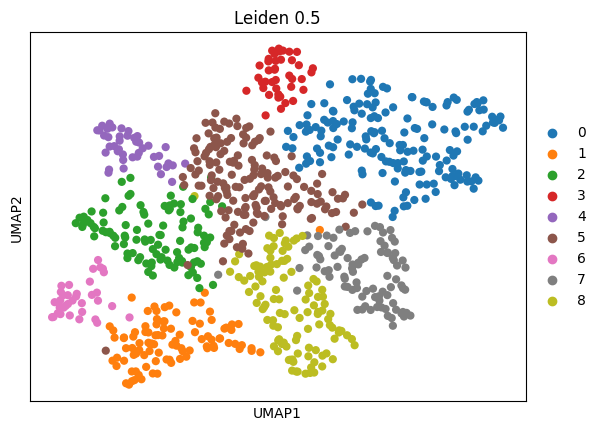

In [29]:
ep.pp.knn_impute(edata)
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")

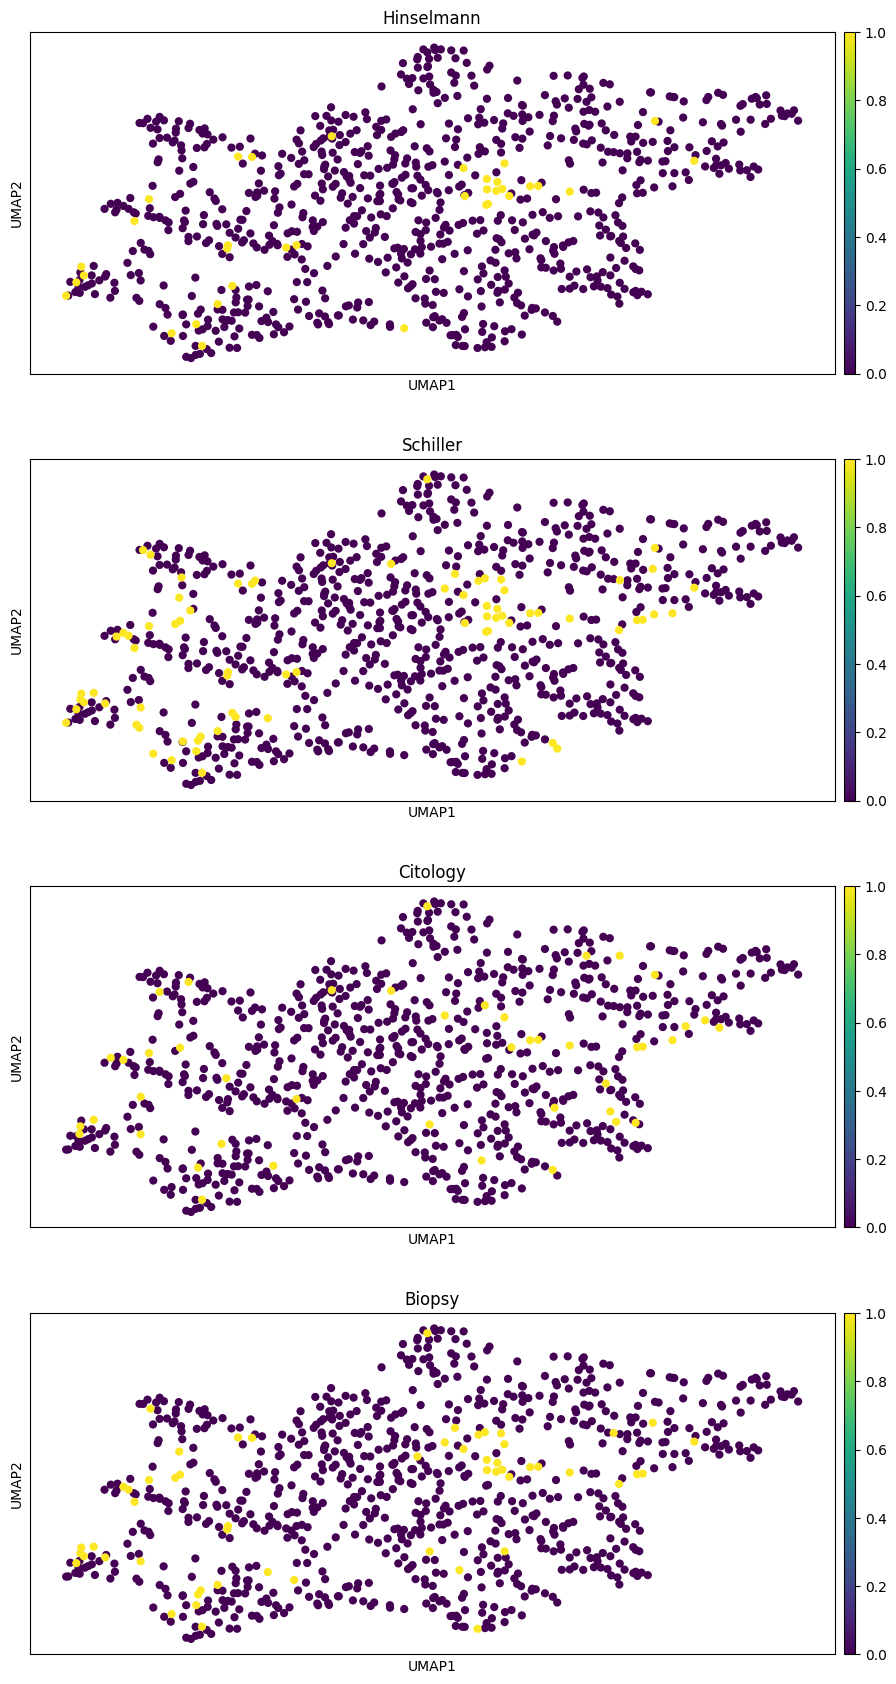

In [30]:
ep.pl.umap(edata, color=["Hinselmann", "Schiller",
           "Citology", "Biopsy"], ncols=1, wspace=0.75)